In [1]:
import pandas as pd
import numpy as np
import os
os.listdir('../my/data')

['BC_1022.csv',
 'BC_32ea_k100_cyto.csv',
 'BC_32ea_k15_cyto.csv',
 'K15_1022.csv',
 'K15_common.csv',
 'normal_1022.csv',
 'Normal_21ea_k100_cyto.csv',
 'Normal_21ea_k15_cyto.csv',
 'PC_1022.csv',
 'PC_20ea_k100_cyto.csv',
 'PC_20ea_k15_cyto.csv',
 'RC_20ea_k100_cyto.csv',
 'TCGA_common.csv',
 'TCGA_data.csv']

In [2]:
#NA
tcga = pd.read_csv('../my/data/TCGA_common.csv')
urine = pd.read_csv('../my/data/K15_common.csv')

urine_BC_Norm=urine.loc[urine['cancer'].isin(['Normal','BC'])]
tcga_BC_Norm=tcga.loc[tcga['y'].isin(['Normal','BC'])]
X_train = tcga_BC_Norm.drop('y', axis = 1)
y_train = tcga_BC_Norm['y']
X_test = urine_BC_Norm.drop('cancer',axis=1)
y_test= urine_BC_Norm['cancer']

print('X_train shape : , ', X_train.shape, 'y_train : ', y_train.shape)
print('X_test shape : , ', X_test.shape, 'y_test : ', y_test.shape)

X_train shape : ,  (2114, 763) y_train :  (2114,)
X_test shape : ,  (53, 763) y_test :  (53,)


In [3]:
y_train[y_train == 'BC'] = 1
y_train[y_train == 'Normal'] = 0

y_test[y_test == 'BC'] = 1
y_test[y_test == 'Normal'] = 0

y_train = y_train.astype('int')
y_test = y_test.astype('int')

C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wjssm\Anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\wjssm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C

In [4]:
tcga.head()

,cyto.1p36.32,cyto.1p36.31,cyto.1p36.23,cyto.1p36.22,cyto.1p36.21,cyto.1p36.13,cyto.1p36.12,cyto.1p36.11,cyto.1p35.3,cyto.1p35.2,...,cyto.9q32,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3,y
0,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,...,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,BC
1,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,...,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,Normal
2,0.4150,0.4150,0.4150,0.4150,0.4150,0.4150,0.4150,-0.2961,0.9639,-0.2736,...,-0.2716,-0.2716,-0.2716,-0.2716,-0.3456,-0.3456,0.2685,-0.3587,-0.3587,BC
3,-0.0006,-0.0006,-0.0006,-0.0006,0.0033,0.0033,0.0033,0.0033,0.0033,0.0033,...,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,Normal
4,-0.0130,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,...,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,Normal


In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

def get_eval(y_test, pred) :
    
    print('accuracy : {0:.4f} precision : {1:.4f} recall : {2:.4f} F1 : {3:.4f} AUC : {4:.4f}'.format(
                                                        accuracy_score(y_test, pred), 
                                                        precision_score(y_test, pred),
                                                        recall_score(y_test, pred),
                                                        f1_score(y_test,pred),
                                                        roc_auc_score(y_test, pred)
                                                                      ))
    
    
    
    #print('accuracy : {0:.4f}'.format(accuracy_score(y_test,pred)), 'roc_auc_score : ', roc_auc_score(y_test,pred))
    #print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

In [6]:
import matplotlib.pyplot as plt

In [7]:
#draw roc curve
def roc_curve_plot(y_test, pred_proba) :
    
    fpr, tpr, threshold = roc_curve(y_test, pred_proba)
    plt.plot(fpr, tpr, label = 'ROC')
    plt.plot([0,1],[0,1],'k--', label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

# scaling

In [8]:
X_test = X_test[X_train.columns]
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
#MinMaxScaler
X_train_mms = MinMaxScaler().fit_transform(X_train)
X_test_mms = MinMaxScaler().fit_transform(X_test)

#MaxAbsScaler
X_train_mas = MaxAbsScaler().fit_transform(X_train)
X_test_mas = MaxAbsScaler().fit_transform(X_test)

# Decision_Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

print('###original data result###')
dt.fit(X_train, y_train)
get_eval(y_test, dt.predict(X_test))
print('\n')
print('###MinMaxScaler data result###')
dt.fit(X_train_mms, y_train)
get_eval(y_test, dt.predict(X_test_mms))
print('\n')
print('###MaxAbsScaler data result###')
dt.fit(X_train_mas, y_train)
get_eval(y_test, dt.predict(X_test_mas))

###original data result###
accuracy : 0.6226 precision : 0.6429 recall : 0.8438 F1 : 0.7297 AUC : 0.5647
[[ 6 15]
 [ 5 27]]


###MinMaxScaler data result###
accuracy : 0.6038 precision : 0.6078 recall : 0.9688 F1 : 0.7470 AUC : 0.5082
[[ 1 20]
 [ 1 31]]


###MaxAbsScaler data result###
accuracy : 0.5849 precision : 0.5962 recall : 0.9688 F1 : 0.7381 AUC : 0.4844
[[ 0 21]
 [ 1 31]]


In [174]:
from sklearn.model_selection import GridSearchCV

prams = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt, param_grid = prams, scoring = 'accuracy', cv = 3)
grid_cv.fit(X_train_mas, y_train)
print('GridSearchCV best accuracy : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV best hyperparameter', grid_cv.best_params_)

GridSearchCV best accuracy : 0.9730
GridSearchCV best hyperparameter {'max_depth': 8}


In [175]:
max_depth = [4,5,6,7,8,9,10]

for depth in max_depth :
    dt = DecisionTreeClassifier(random_state = 156, max_depth = depth)
    dt.fit(X_train_mas, y_train)
    pred = dt.predict(X_test_mas)
    auc = roc_auc_score(y_test, pred)
    print('max_depth = {0} accuracy : {1:.4f}'.format(depth, auc))

max_depth = 4 accuracy : 0.4301
max_depth = 5 accuracy : 0.4226
max_depth = 6 accuracy : 0.4546
max_depth = 7 accuracy : 0.4688
max_depth = 8 accuracy : 0.5082
max_depth = 9 accuracy : 0.4702
max_depth = 10 accuracy : 0.4621


In [176]:
# max_depth = 7 - MaxAbsScaler
dt = DecisionTreeClassifier(random_state = 156, max_depth = 8)
dt.fit(X_train_mas, y_train)
pred = dt.predict(X_test_mas)

get_eval(y_test, pred)

accuracy : 0.6038 precision : 0.6078 recall : 0.9688 F1 : 0.7470 AUC : 0.5082
[[ 1 20]
 [ 1 31]]


In [177]:
# max_depth = 7 - MinMaxScaler
dt = DecisionTreeClassifier(random_state = 156, max_depth = 8)
dt.fit(X_train_mms, y_train)
pred = dt.predict(X_test_mms)

get_eval(y_test, pred)

accuracy : 0.6038 precision : 0.6078 recall : 0.9688 F1 : 0.7470 AUC : 0.5082
[[ 1 20]
 [ 1 31]]


In [178]:
# max_depth = 7 - Original data
dt = DecisionTreeClassifier(random_state = 156, max_depth = 8)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

get_eval(y_test, pred)

accuracy : 0.5660 precision : 0.5957 recall : 0.8750 F1 : 0.7089 AUC : 0.4851
[[ 2 19]
 [ 4 28]]


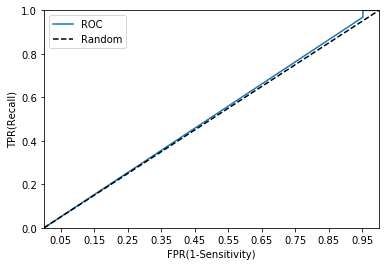

In [180]:
dt = DecisionTreeClassifier(random_state = 156, max_depth = 8)
dt.fit(X_train_mas, y_train)
pred = dt.predict(X_test_mas)
pred_proba = dt.predict_proba(X_test_mas)

roc_curve_plot(y_test, pred_proba[:,1])

In [20]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_prba_c1, thresholds) :
    
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_prba_c1)
        custom_predict = binarizer.transform(pred_prba_c1)
        
        print('threshold ; ', custom_threshold)
        get_eval(y_test, custom_predict)
        print('\n')

In [181]:
#decision tree predict proba return only class
thresholds = [0.50,0.9]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold ;  0.5
accuracy : 0.6038 precision : 0.6078 recall : 0.9688 F1 : 0.7470 AUC : 0.5082
[[ 1 20]
 [ 1 31]]


threshold ;  0.9
accuracy : 0.6038 precision : 0.6078 recall : 0.9688 F1 : 0.7470 AUC : 0.5082
[[ 1 20]
 [ 1 31]]




# Randomforest

In [17]:
from sklearn.ensemble import RandomForestClassifier

## MinMaxScale

In [182]:
params = {
    'n_estimators' : [100,200],
    'max_depth' : [6,7,8,9,10,11,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

rf = RandomForestClassifier(n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid=params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train_mms, y_train)

print('best hyperparameter : ', grid_cv.best_params_)
print('best accuray : {0:.4f}'.format(grid_cv.best_score_))

best hyperparameter :  {'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 200}
best accuray : 0.9849


In [193]:
rf_best = RandomForestClassifier(n_jobs = -1, max_depth=7, min_samples_leaf=8, min_samples_split=16,
                                n_estimators = 200)
rf_best.fit(X_train_mms, y_train)
pred = rf_best.predict(X_test_mms)
pred_proba = rf_best.predict_proba(X_test_mms)
get_eval(y_test, pred)
#bad

accuracy : 0.6038 precision : 0.6038 recall : 1.0000 F1 : 0.7529 AUC : 0.5000
[[ 0 21]
 [ 0 32]]


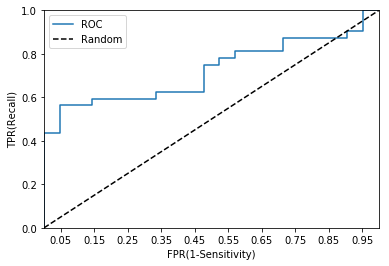

In [194]:
roc_curve_plot(y_test, pred_proba[:,1])

In [199]:
thresholds = [0.575,0.6,0.625,0.65,0.675,0.7]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold ;  0.575
accuracy : 0.6038 precision : 0.6774 recall : 0.6562 F1 : 0.6667 AUC : 0.5900
[[11 10]
 [11 21]]


threshold ;  0.6
accuracy : 0.6415 precision : 0.7600 recall : 0.5938 F1 : 0.6667 AUC : 0.6540
[[15  6]
 [13 19]]


threshold ;  0.625
accuracy : 0.6981 precision : 0.9000 recall : 0.5625 F1 : 0.6923 AUC : 0.7336
[[19  2]
 [14 18]]


threshold ;  0.65
accuracy : 0.7170 precision : 0.9474 recall : 0.5625 F1 : 0.7059 AUC : 0.7574
[[20  1]
 [14 18]]


threshold ;  0.675
accuracy : 0.6415 precision : 0.9333 recall : 0.4375 F1 : 0.5957 AUC : 0.6949
[[20  1]
 [18 14]]


threshold ;  0.7
accuracy : 0.6415 precision : 1.0000 recall : 0.4062 F1 : 0.5778 AUC : 0.7031
[[21  0]
 [19 13]]




## MaxAbsScaler

In [200]:
rf = RandomForestClassifier(n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid=params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train_mas, y_train)

print('best hyperparameter : ', grid_cv.best_params_)
print('best accuray : {0:.4f}'.format(grid_cv.best_score_))

best hyperparameter :  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
best accuray : 0.9853


In [201]:
rf_best = RandomForestClassifier(n_jobs = -1, max_depth=8, min_samples_leaf=8, min_samples_split=8,
                                n_estimators = 200)
rf_best.fit(X_train_mas, y_train)
pred = rf_best.predict(X_test_mas)
pred_proba = rf_best.predict_proba(X_test_mas)

get_eval(y_test, pred)

accuracy : 0.6038 precision : 0.6038 recall : 1.0000 F1 : 0.7529 AUC : 0.5000
[[ 0 21]
 [ 0 32]]


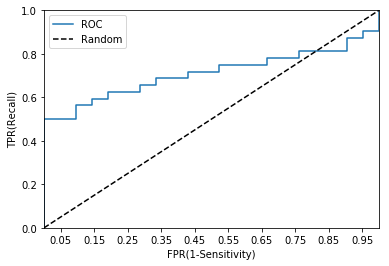

In [202]:
roc_curve_plot(y_test, pred_proba[:,1])

In [206]:
thresholds = [0.7,0.75,0.8,0.85,0.9]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold ;  0.7
accuracy : 0.5660 precision : 0.5882 recall : 0.9375 F1 : 0.7229 AUC : 0.4688
[[ 0 21]
 [ 2 30]]


threshold ;  0.75
accuracy : 0.5283 precision : 0.5778 recall : 0.8125 F1 : 0.6753 AUC : 0.4539
[[ 2 19]
 [ 6 26]]


threshold ;  0.8
accuracy : 0.6604 precision : 0.7333 recall : 0.6875 F1 : 0.7097 AUC : 0.6533
[[13  8]
 [10 22]]


threshold ;  0.85
accuracy : 0.6792 precision : 1.0000 recall : 0.4688 F1 : 0.6383 AUC : 0.7344
[[21  0]
 [17 15]]


threshold ;  0.9
accuracy : 0.5849 precision : 1.0000 recall : 0.3125 F1 : 0.4762 AUC : 0.6562
[[21  0]
 [22 10]]




# GBM

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [67]:
print('###original data result###')
gb.fit(X_train, y_train)
get_eval(y_test, gb.predict(X_test))
print('\n')
print('###MinMaxScaler data result###')
gb.fit(X_train_mms, y_train)
get_eval(y_test, gb.predict(X_test_mms))
print('\n')
print('###MaxAbsScaler data result###')
gb.fit(X_train_mas, y_train)
get_eval(y_test, gb.predict(X_test_mas))

###original data result###
accuracy : 0.6038 precision : 0.6038 recall : 1.0000 F1 : 0.7529 AUC : 0.5000
[[ 0 21]
 [ 0 32]]


###MinMaxScaler data result###
accuracy : 0.6038 precision : 0.6038 recall : 1.0000 F1 : 0.7529 AUC : 0.5000
[[ 0 21]
 [ 0 32]]


###MaxAbsScaler data result###
accuracy : 0.6038 precision : 0.6038 recall : 1.0000 F1 : 0.7529 AUC : 0.5000
[[ 0 21]
 [ 0 32]]


# svm

In [79]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

In [234]:
print('###original data result###')
svc.fit(X_train, y_train)
get_eval(y_test, svc.predict(X_test))
print('\n')
print('###MinMaxScaler data result###')
svc.fit(X_train_mms, y_train)
get_eval(y_test, svc.predict(X_test_mms))
print('\n')
print('###MaxAbsScaler data result###')
svc.fit(X_train_mas, y_train)
get_eval(y_test, svc.predict(X_test_mas))

###original data result###
accuracy : 0.6415 precision : 1.0000 recall : 0.4062 F1 : 0.5778 AUC : 0.7031
[[21  0]
 [19 13]]


###MinMaxScaler data result###
accuracy : 0.5472 precision : 1.0000 recall : 0.2500 F1 : 0.4000 AUC : 0.6250
[[21  0]
 [24  8]]


###MaxAbsScaler data result###
accuracy : 0.6415 precision : 1.0000 recall : 0.4062 F1 : 0.5778 AUC : 0.7031
[[21  0]
 [19 13]]


In [236]:
svc = SVC(kernel='rbf', probability=True)

In [237]:
#original data
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
svc_proba = svc.predict_proba(X_test)

In [238]:
thresholds = [0.7,0.75,0.8,0.85,0.9]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


threshold ;  0.7
accuracy : 0.5660 precision : 0.5882 recall : 0.9375 F1 : 0.7229 AUC : 0.4688
[[ 0 21]
 [ 2 30]]


threshold ;  0.75
accuracy : 0.5283 precision : 0.5778 recall : 0.8125 F1 : 0.6753 AUC : 0.4539
[[ 2 19]
 [ 6 26]]


threshold ;  0.8
accuracy : 0.6604 precision : 0.7333 recall : 0.6875 F1 : 0.7097 AUC : 0.6533
[[13  8]
 [10 22]]


threshold ;  0.85
accuracy : 0.6792 precision : 1.0000 recall : 0.4688 F1 : 0.6383 AUC : 0.7344
[[21  0]
 [17 15]]


threshold ;  0.9
accuracy : 0.5849 precision : 1.0000 recall : 0.3125 F1 : 0.4762 AUC : 0.6562
[[21  0]
 [22 10]]




In [239]:
#minmaxsclae
svc.fit(X_train_mms, y_train)
pred = svc.predict(X_test_mms)
svc_proba = svc.predict_proba(X_test_mms)

In [240]:
thresholds = [0.7,0.75,0.8,0.85,0.9]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


threshold ;  0.7
accuracy : 0.5660 precision : 0.5882 recall : 0.9375 F1 : 0.7229 AUC : 0.4688
[[ 0 21]
 [ 2 30]]


threshold ;  0.75
accuracy : 0.5283 precision : 0.5778 recall : 0.8125 F1 : 0.6753 AUC : 0.4539
[[ 2 19]
 [ 6 26]]


threshold ;  0.8
accuracy : 0.6604 precision : 0.7333 recall : 0.6875 F1 : 0.7097 AUC : 0.6533
[[13  8]
 [10 22]]


threshold ;  0.85
accuracy : 0.6792 precision : 1.0000 recall : 0.4688 F1 : 0.6383 AUC : 0.7344
[[21  0]
 [17 15]]


threshold ;  0.9
accuracy : 0.5849 precision : 1.0000 recall : 0.3125 F1 : 0.4762 AUC : 0.6562
[[21  0]
 [22 10]]




In [241]:
#maxabsscale
svc.fit(X_train_mas, y_train)
pred = svc.predict(X_test_mas)
svc_proba = svc.predict_proba(X_test_mas)

In [242]:
thresholds = [0.7,0.75,0.8,0.85,0.9]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold ;  0.7
accuracy : 0.5660 precision : 0.5882 recall : 0.9375 F1 : 0.7229 AUC : 0.4688
[[ 0 21]
 [ 2 30]]


threshold ;  0.75
accuracy : 0.5283 precision : 0.5778 recall : 0.8125 F1 : 0.6753 AUC : 0.4539
[[ 2 19]
 [ 6 26]]


threshold ;  0.8
accuracy : 0.6604 precision : 0.7333 recall : 0.6875 F1 : 0.7097 AUC : 0.6533
[[13  8]
 [10 22]]


threshold ;  0.85
accuracy : 0.6792 precision : 1.0000 recall : 0.4688 F1 : 0.6383 AUC : 0.7344
[[21  0]
 [17 15]]


threshold ;  0.9
accuracy : 0.5849 precision : 1.0000 recall : 0.3125 F1 : 0.4762 AUC : 0.6562
[[21  0]
 [22 10]]




# logisticRegression
- standardScaler

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
ss = StandardScaler()
lr = LogisticRegression()

In [98]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [135]:
lr.fit(X_train_ss, y_train)
pred = lr.predict(X_test_ss)
pred_proba = lr.predict_proba(X_test_ss)
get_eval(y_test, pred)

accuracy : 0.5472 precision : 0.6818 recall : 0.4688 F1 : 0.5556 AUC : 0.5677
[[14  7]
 [17 15]]


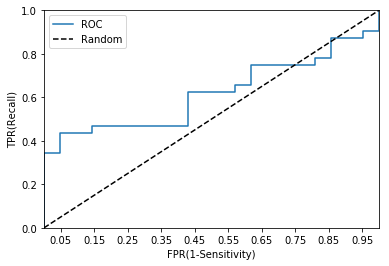

In [136]:
roc_curve_plot(y_test, pred_proba[:,1])

In [138]:
thresholds = [0.7,0.75,0.8,0.85,0.9]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)
#best : 0.75

threshold ;  0.7
accuracy : 0.6038 precision : 0.7895 recall : 0.4688 F1 : 0.5882 AUC : 0.6391
[[17  4]
 [17 15]]


threshold ;  0.75
accuracy : 0.6226 precision : 0.8333 recall : 0.4688 F1 : 0.6000 AUC : 0.6629
[[18  3]
 [17 15]]


threshold ;  0.8
accuracy : 0.6226 precision : 0.8750 recall : 0.4375 F1 : 0.5833 AUC : 0.6711
[[19  2]
 [18 14]]


threshold ;  0.85
accuracy : 0.6038 precision : 0.9231 recall : 0.3750 F1 : 0.5333 AUC : 0.6637
[[20  1]
 [20 12]]


threshold ;  0.9
accuracy : 0.6038 precision : 1.0000 recall : 0.3438 F1 : 0.5116 AUC : 0.6719
[[21  0]
 [21 11]]




# XGBoost

In [148]:
from xgboost import XGBClassifier


In [154]:
print(X_train.shape)
print(X_test.shape)

(2114, 763)
(53, 763)


In [225]:
#original data
xgb = XGBClassifier(learning_rate=0.001, n_estimators=400, n_jobs=-1, max_depth = 7)
evals = [(X_test, y_test)]
xgb.fit(X_train, y_train ,eval_set = evals, verbose = 50, early_stopping_rounds = 100, eval_metric = 'logloss')

[0]	validation_0-logloss:0.692979
Will train until validation_0-logloss hasn't improved in 100 rounds.
[50]	validation_0-logloss:0.685458
[100]	validation_0-logloss:0.679325
[150]	validation_0-logloss:0.674503
[200]	validation_0-logloss:0.670786
[250]	validation_0-logloss:0.668171
[300]	validation_0-logloss:0.666476
[350]	validation_0-logloss:0.665627
[399]	validation_0-logloss:0.665521


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [226]:
xgb_pred = xgb.predict(X_test)
get_eval(y_test, xgb_pred)
xgb_proba = xgb.predict_proba(X_test)

accuracy : 0.5660 precision : 0.6216 recall : 0.7188 F1 : 0.6667 AUC : 0.5260
[[ 7 14]
 [ 9 23]]


In [227]:
thresholds = [0.7,0.75,0.8,0.85,0.9]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


threshold ;  0.7
accuracy : 0.5660 precision : 0.5882 recall : 0.9375 F1 : 0.7229 AUC : 0.4688
[[ 0 21]
 [ 2 30]]


threshold ;  0.75
accuracy : 0.5283 precision : 0.5778 recall : 0.8125 F1 : 0.6753 AUC : 0.4539
[[ 2 19]
 [ 6 26]]


threshold ;  0.8
accuracy : 0.6604 precision : 0.7333 recall : 0.6875 F1 : 0.7097 AUC : 0.6533
[[13  8]
 [10 22]]


threshold ;  0.85
accuracy : 0.6792 precision : 1.0000 recall : 0.4688 F1 : 0.6383 AUC : 0.7344
[[21  0]
 [17 15]]


threshold ;  0.9
accuracy : 0.5849 precision : 1.0000 recall : 0.3125 F1 : 0.4762 AUC : 0.6562
[[21  0]
 [22 10]]




In [228]:
#MinMAxScale
xgb = XGBClassifier(learning_rate=0.001, n_estimators=400, n_jobs=-1, max_depth = 10)
evals = [(X_test_mms, y_test)]
xgb.fit(X_train_mms, y_train ,eval_set = evals, verbose = 50, early_stopping_rounds = 100, eval_metric = 'logloss')

[0]	validation_0-logloss:0.692969
Will train until validation_0-logloss hasn't improved in 100 rounds.
[50]	validation_0-logloss:0.684518
[100]	validation_0-logloss:0.678019
[150]	validation_0-logloss:0.673086
[200]	validation_0-logloss:0.669515
[250]	validation_0-logloss:0.667155
[300]	validation_0-logloss:0.665881
[350]	validation_0-logloss:0.66558
[399]	validation_0-logloss:0.666121


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [229]:
xgb_pred = xgb.predict(X_test_mms)
get_eval(y_test, xgb_pred)
xgb_proba = xgb.predict_proba(X_test_mms)

accuracy : 0.6038 precision : 0.6122 recall : 0.9375 F1 : 0.7407 AUC : 0.5164
[[ 2 19]
 [ 2 30]]


In [230]:
thresholds = [0.7,0.75,0.8,0.85,0.9]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


threshold ;  0.7
accuracy : 0.5660 precision : 0.5882 recall : 0.9375 F1 : 0.7229 AUC : 0.4688
[[ 0 21]
 [ 2 30]]


threshold ;  0.75
accuracy : 0.5283 precision : 0.5778 recall : 0.8125 F1 : 0.6753 AUC : 0.4539
[[ 2 19]
 [ 6 26]]


threshold ;  0.8
accuracy : 0.6604 precision : 0.7333 recall : 0.6875 F1 : 0.7097 AUC : 0.6533
[[13  8]
 [10 22]]


threshold ;  0.85
accuracy : 0.6792 precision : 1.0000 recall : 0.4688 F1 : 0.6383 AUC : 0.7344
[[21  0]
 [17 15]]


threshold ;  0.9
accuracy : 0.5849 precision : 1.0000 recall : 0.3125 F1 : 0.4762 AUC : 0.6562
[[21  0]
 [22 10]]




In [231]:
#MinMAxScale
xgb = XGBClassifier(learning_rate=0.001, n_estimators=400, n_jobs=-1, max_depth = 10)
evals = [(X_test_mas, y_test)]
xgb.fit(X_train_mas, y_train ,eval_set = evals, verbose = 50, early_stopping_rounds = 100, eval_metric = 'logloss')

[0]	validation_0-logloss:0.693011
Will train until validation_0-logloss hasn't improved in 100 rounds.
[50]	validation_0-logloss:0.686535
[100]	validation_0-logloss:0.681947
[150]	validation_0-logloss:0.678803
[200]	validation_0-logloss:0.676817
[250]	validation_0-logloss:0.675865
[300]	validation_0-logloss:0.675835
[350]	validation_0-logloss:0.676616
Stopping. Best iteration:
[277]	validation_0-logloss:0.675739



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [232]:
xgb_pred = xgb.predict(X_test_mas)
get_eval(y_test, xgb_pred)
xgb_proba = xgb.predict_proba(X_test_mas)

accuracy : 0.5283 precision : 0.5814 recall : 0.7812 F1 : 0.6667 AUC : 0.4621
[[ 3 18]
 [ 7 25]]


In [233]:
thresholds = [0.7,0.75,0.8,0.85,0.9]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


threshold ;  0.7
accuracy : 0.5660 precision : 0.5882 recall : 0.9375 F1 : 0.7229 AUC : 0.4688
[[ 0 21]
 [ 2 30]]


threshold ;  0.75
accuracy : 0.5283 precision : 0.5778 recall : 0.8125 F1 : 0.6753 AUC : 0.4539
[[ 2 19]
 [ 6 26]]


threshold ;  0.8
accuracy : 0.6604 precision : 0.7333 recall : 0.6875 F1 : 0.7097 AUC : 0.6533
[[13  8]
 [10 22]]


threshold ;  0.85
accuracy : 0.6792 precision : 1.0000 recall : 0.4688 F1 : 0.6383 AUC : 0.7344
[[21  0]
 [17 15]]


threshold ;  0.9
accuracy : 0.5849 precision : 1.0000 recall : 0.3125 F1 : 0.4762 AUC : 0.6562
[[21  0]
 [22 10]]




# lightgbm

In [9]:
from lightgbm import LGBMClassifier

In [14]:
lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.01)
evals = [(X_test, y_test)]

lgbm.fit(X_train ,y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals, verbose = 50)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's binary_logloss: 0.708923	valid_0's binary_logloss: 0.708923
[100]	valid_0's binary_logloss: 0.642708	valid_0's binary_logloss: 0.642708
[150]	valid_0's binary_logloss: 0.64509	valid_0's binary_logloss: 0.64509
[200]	valid_0's binary_logloss: 0.678437	valid_0's binary_logloss: 0.678437
Early stopping, best iteration is:
[127]	valid_0's binary_logloss: 0.637873	valid_0's binary_logloss: 0.637873


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
pred = lgbm.predict(X_test)
get_eval(y_test, pred)

accuracy : 0.5849 precision : 0.6190 recall : 0.8125 F1 : 0.7027 AUC : 0.5253
[[ 5 16]
 [ 6 26]]


In [16]:
#minmaxscale
lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.01)
evals = [(X_test_mms, y_test)]

lgbm.fit(X_train_mms ,y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals, verbose = 50)
pred = lgbm.predict(X_test_mms)
get_eval(y_test, pred)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's binary_logloss: 0.742225	valid_0's binary_logloss: 0.742225
[100]	valid_0's binary_logloss: 0.662305	valid_0's binary_logloss: 0.662305
[150]	valid_0's binary_logloss: 0.643509	valid_0's binary_logloss: 0.643509
[200]	valid_0's binary_logloss: 0.642075	valid_0's binary_logloss: 0.642075
[250]	valid_0's binary_logloss: 0.667928	valid_0's binary_logloss: 0.667928
Early stopping, best iteration is:
[177]	valid_0's binary_logloss: 0.639454	valid_0's binary_logloss: 0.639454
accuracy : 0.5849 precision : 0.6190 recall : 0.8125 F1 : 0.7027 AUC : 0.5253
[[ 5 16]
 [ 6 26]]


In [17]:
#maxabsscale
lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.01)
evals = [(X_test_mas, y_test)]

lgbm.fit(X_train_mas ,y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals, verbose = 50)
pred = lgbm.predict(X_test_mas)
get_eval(y_test, pred)#maxabsscale

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's binary_logloss: 0.700912	valid_0's binary_logloss: 0.700912
[100]	valid_0's binary_logloss: 0.616291	valid_0's binary_logloss: 0.616291
[150]	valid_0's binary_logloss: 0.643785	valid_0's binary_logloss: 0.643785
[200]	valid_0's binary_logloss: 0.704194	valid_0's binary_logloss: 0.704194
Early stopping, best iteration is:
[110]	valid_0's binary_logloss: 0.613479	valid_0's binary_logloss: 0.613479
accuracy : 0.6604 precision : 0.6667 recall : 0.8750 F1 : 0.7568 AUC : 0.6042
[[ 7 14]
 [ 4 28]]


In [27]:
pred_proba = lgbm.predict_proba(X_test)
thresholds = [0.5,0.55,0.6,0.65]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


threshold ;  0.5
accuracy : 0.6604 precision : 0.6750 recall : 0.8438 F1 : 0.7500 AUC : 0.6124
[[ 8 13]
 [ 5 27]]


threshold ;  0.55
accuracy : 0.6415 precision : 0.6857 recall : 0.7500 F1 : 0.7164 AUC : 0.6131
[[10 11]
 [ 8 24]]


threshold ;  0.6
accuracy : 0.7358 precision : 0.8000 recall : 0.7500 F1 : 0.7742 AUC : 0.7321
[[15  6]
 [ 8 24]]


threshold ;  0.65
accuracy : 0.6792 precision : 0.7778 recall : 0.6562 F1 : 0.7119 AUC : 0.6853
[[15  6]
 [11 21]]


